In [1]:
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv("Admission_Predict.csv")

In [3]:
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         400 non-null    int64  
 1   GRE Score          400 non-null    int64  
 2   TOEFL Score        400 non-null    int64  
 3   University Rating  400 non-null    int64  
 4   SOP                400 non-null    float64
 5   LOR                400 non-null    float64
 6   CGPA               400 non-null    float64
 7   Research           400 non-null    int64  
 8   Chance of Admit    400 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 28.2 KB


## Analysis of GRE Score with Cahnce of Admit

In [5]:
df['Chance of Admit '] = df['Chance of Admit '].apply(lambda x: 1 if x >= 0.75 else 0)

In [6]:
df['Chance of Admit ']

0      1
1      1
2      0
3      1
4      0
      ..
395    1
396    1
397    1
398    0
399    1
Name: Chance of Admit , Length: 400, dtype: int64

#### Range of gre scores for admitted Students 

In [7]:
admit=df[df['Chance of Admit ']==1]

In [8]:
admit

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,1
1,2,324,107,4,4.0,4.5,8.87,1,1
3,4,322,110,3,3.5,2.5,8.67,1,1
5,6,330,115,5,4.5,3.0,9.34,1,1
6,7,321,109,3,3.0,4.0,8.20,1,1
...,...,...,...,...,...,...,...,...,...
394,395,329,111,4,4.5,4.0,9.23,1,1
395,396,324,110,3,3.5,3.5,9.04,1,1
396,397,325,107,3,3.0,3.5,9.11,1,1
397,398,330,116,4,5.0,4.5,9.45,1,1


In [9]:
admit["GRE Score"].min()

303

In [10]:
admit["GRE Score"].max()

340

#### Average Gre Score for admission

In [11]:
admit["GRE Score"].mean()

325.5

#### Candidates less than the average gre score 

In [12]:
less_avg=admit[admit["GRE Score"]<admit["GRE Score"].mean()]

In [13]:
less_avg.value_counts()

Serial No.  GRE Score  TOEFL Score  University Rating  SOP  LOR   CGPA  Research  Chance of Admit 
2           324        107          4                  4.0  4.5   8.87  1         1                   1
265         325        110          2                  3.0  2.5   8.76  1         1                   1
297         310        107          3                  3.5  3.5   8.67  0         1                   1
290         313        109          3                  4.0  3.5   9.00  0         1                   1
289         314        104          4                  5.0  5.0   9.02  0         1                   1
                                                                                                     ..
166         322        110          5                  4.5  4.0   8.97  0         1                   1
156         312        109          3                  3.0  3.0   8.69  0         1                   1
154         324        105          3                  3.0  4.0   8.7

C:\Users\tanta\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='GRE Score', ylabel='Count'>

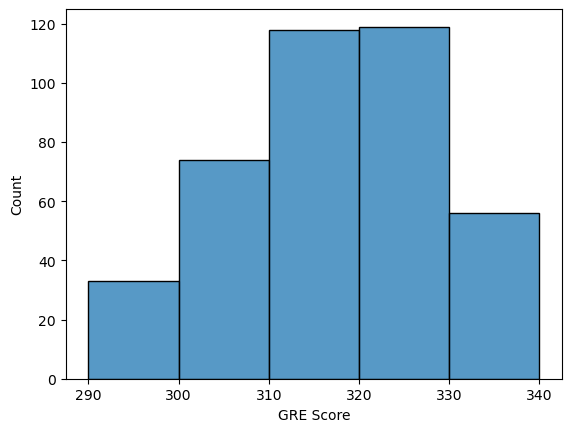

In [14]:
sn.histplot(data=df,x="GRE Score",bins=5)

## Analysis of TOEFL Score with Admission

In [15]:
admit

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,1
1,2,324,107,4,4.0,4.5,8.87,1,1
3,4,322,110,3,3.5,2.5,8.67,1,1
5,6,330,115,5,4.5,3.0,9.34,1,1
6,7,321,109,3,3.0,4.0,8.20,1,1
...,...,...,...,...,...,...,...,...,...
394,395,329,111,4,4.5,4.0,9.23,1,1
395,396,324,110,3,3.5,3.5,9.04,1,1
396,397,325,107,3,3.0,3.5,9.11,1,1
397,398,330,116,4,5.0,4.5,9.45,1,1


### Analyse total number of admitted and not admitted cancidates

<Axes: ylabel='count'>

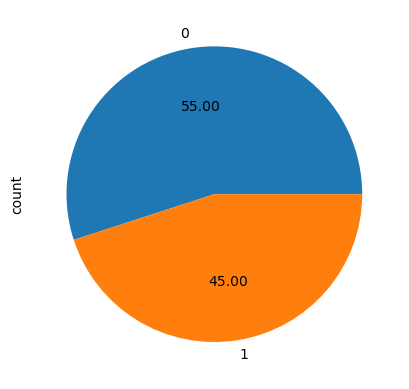

In [16]:
df["Chance of Admit "].value_counts().plot(kind="pie",autopct="%0.2f")

In [17]:
df["Chance of Admit "].value_counts()

Chance of Admit 
0    220
1    180
Name: count, dtype: int64

In [18]:
admit["TOEFL Score"].min()

98

In [19]:
admit["TOEFL Score"].max()

120

In [20]:
df["TOEFL Score"].mean()

107.41

In [21]:
lesstoefl_avg=admit[admit["TOEFL Score"]<admit["TOEFL Score"].mean()]

In [22]:
lesstoefl_avg

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
1,2,324,107,4,4.0,4.5,8.87,1,1
3,4,322,110,3,3.5,2.5,8.67,1,1
6,7,321,109,3,3.0,4.0,8.20,1,1
11,12,327,111,4,4.0,4.5,9.00,1,1
26,27,322,109,5,4.5,3.5,8.80,0,1
...,...,...,...,...,...,...,...,...,...
389,390,320,108,3,3.5,4.0,8.44,1,1
393,394,317,104,2,3.0,3.0,8.76,0,1
394,395,329,111,4,4.5,4.0,9.23,1,1
395,396,324,110,3,3.5,3.5,9.04,1,1


In [23]:
admit.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.0
mean,202.638889,325.500000,111.916667,3.894444,4.080556,4.005556,9.084389,0.833333,1.0
std,111.412754,7.992664,4.620666,0.930533,0.709402,0.745543,0.388569,0.373718,0.0
min,1.000000,303.000000,98.000000,1.000000,2.000000,1.500000,8.000000,0.000000,1.0
25%,128.750000,321.000000,109.000000,3.000000,3.500000,3.500000,8.790000,1.000000,1.0
50%,194.500000,325.000000,112.000000,4.000000,4.000000,4.000000,9.105000,1.000000,1.0
75%,288.250000,331.000000,115.000000,5.000000,4.500000,4.500000,9.352500,1.000000,1.0
max,400.000000,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,1.0


In [24]:
admit.corr()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
Serial No.,1.000000,-0.165471,-0.215361,-0.250888,-0.117884,-0.161090,-0.152252,0.012769,NaN
GRE Score,-0.165471,1.000000,0.756271,0.466837,0.371207,0.283132,0.761953,0.428299,NaN
TOEFL Score,-0.215361,0.756271,1.000000,0.429312,0.385530,0.259607,0.700767,0.302490,NaN
University Rating,-0.250888,0.466837,0.429312,1.000000,0.643445,0.556488,0.537581,0.206163,NaN
SOP,-0.117884,0.371207,0.385530,0.643445,1.000000,0.635562,0.547943,0.124678,NaN
LOR,-0.161090,0.283132,0.259607,0.556488,0.635562,1.000000,0.432175,0.093570,NaN
CGPA,-0.152252,0.761953,0.700767,0.537581,0.547943,0.432175,1.000000,0.317836,NaN
Research,0.012769,0.428299,0.302490,0.206163,0.124678,0.093570,0.317836,1.000000,NaN
Chance of Admit,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<Axes: >

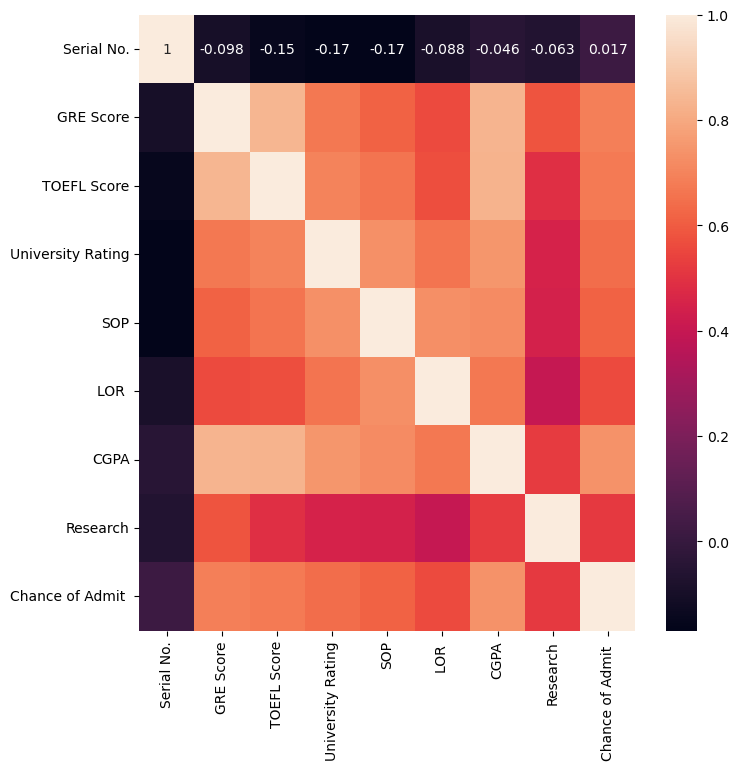

In [25]:
plt.figure(figsize=(8,8))
sn.heatmap(df.corr(),annot=True)

## Feature Engineering 

#### Extra Tree Selector

In [26]:
x=df.loc[:,"GRE Score":"Research"]

In [27]:
x

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,337,118,4,4.5,4.5,9.65,1
1,324,107,4,4.0,4.5,8.87,1
2,316,104,3,3.0,3.5,8.00,1
3,322,110,3,3.5,2.5,8.67,1
4,314,103,2,2.0,3.0,8.21,0
...,...,...,...,...,...,...,...
395,324,110,3,3.5,3.5,9.04,1
396,325,107,3,3.0,3.5,9.11,1
397,330,116,4,5.0,4.5,9.45,1
398,312,103,3,3.5,4.0,8.78,0


In [28]:
y=df.loc[:,"Chance of Admit "]

In [29]:
y

0      1
1      1
2      0
3      1
4      0
      ..
395    1
396    1
397    1
398    0
399    1
Name: Chance of Admit , Length: 400, dtype: int64

In [30]:
from sklearn.preprocessing import MinMaxScaler

In [31]:
ss=MinMaxScaler()

In [32]:
x=ss.fit_transform(x)

In [33]:
x

array([[0.94      , 0.92857143, 0.75      , ..., 0.875     , 0.91346154,
        1.        ],
       [0.68      , 0.53571429, 0.75      , ..., 0.875     , 0.66346154,
        1.        ],
       [0.52      , 0.42857143, 0.5       , ..., 0.625     , 0.38461538,
        1.        ],
       ...,
       [0.8       , 0.85714286, 0.75      , ..., 0.875     , 0.84935897,
        1.        ],
       [0.44      , 0.39285714, 0.5       , ..., 0.75      , 0.63461538,
        0.        ],
       [0.86      , 0.89285714, 0.75      , ..., 0.75      , 0.91666667,
        1.        ]])

In [34]:
y

0      1
1      1
2      0
3      1
4      0
      ..
395    1
396    1
397    1
398    0
399    1
Name: Chance of Admit , Length: 400, dtype: int64

In [35]:
from sklearn.ensemble import ExtraTreesClassifier

In [36]:
etc=ExtraTreesClassifier()

In [37]:
etc.fit(x,y)

ExtraTreesClassifier()

In [38]:
cols=['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR', 'CGPA', 'Research']
features_imp=pd.Series(etc.feature_importances_,index=cols)

In [39]:
features_imp

GRE Score            0.158454
TOEFL Score          0.150123
University Rating    0.109745
SOP                  0.105595
LOR                  0.095805
CGPA                 0.263158
Research             0.117120
dtype: float64

<Axes: >

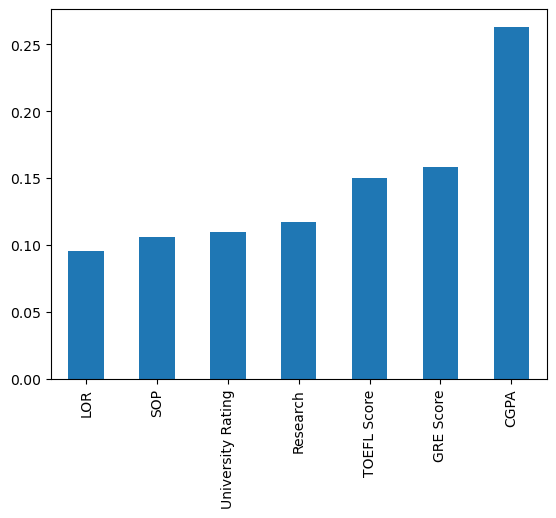

In [40]:
features_imp.sort_values().plot(kind="bar")

In [41]:
admit["CGPA"].max()

9.92

In [42]:
admit["CGPA"].min()



8.0

In [43]:
admit["CGPA"].mean()

9.084388888888888

#### Scoring feature Selection

In [44]:
from sklearn.feature_selection import SelectKBest

In [45]:
from sklearn.feature_selection import chi2

In [46]:
bestfeatures = SelectKBest(score_func=chi2, k =7).fit(x, y)

In [47]:
bestfeatures.scores_

array([18.44900274, 15.40494029, 25.52175951, 15.78940446, 10.20418507,
       13.74219242, 48.83727688])

In [48]:
cols=['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR', 'CGPA', 'Research']
bestfeature=pd.Series(bestfeatures.scores_,index=cols)

In [49]:
bestfeature

GRE Score            18.449003
TOEFL Score          15.404940
University Rating    25.521760
SOP                  15.789404
LOR                  10.204185
CGPA                 13.742192
Research             48.837277
dtype: float64

<Axes: >

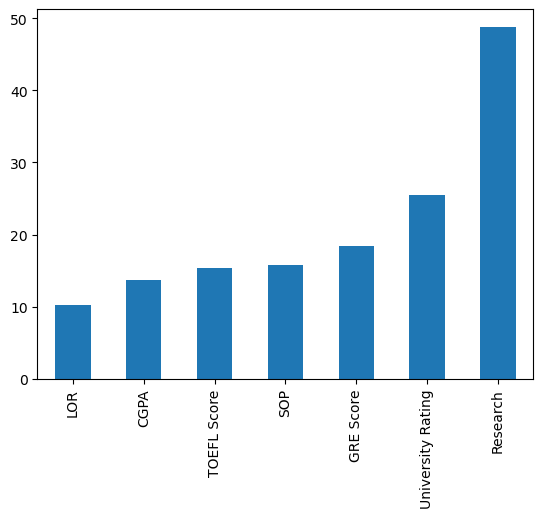

In [50]:
bestfeature.sort_values().plot(kind="bar")

#### Recursive Feature Elimination

In [51]:
from sklearn.feature_selection import RFE

In [52]:
from sklearn.linear_model import LogisticRegression

In [53]:
model = LogisticRegression()

# Initialize RFE and fit the model
rfe = RFE(model, n_features_to_select=1)  # Select 1 feature at a time
rfe.fit(x, y)

# Get the feature rankings
feature_rankings = rfe.ranking_



In [54]:
feature_rankings

array([2, 4, 5, 3, 6, 1, 7])

In [55]:
col_rankings = {cols: rank for cols, rank in zip(cols, feature_rankings)}

# Print the column names along with their rankings
for col in cols:
    print(f"{col}: Rank {col_rankings[col]}")

GRE Score: Rank 2
TOEFL Score: Rank 4
University Rating: Rank 5
SOP: Rank 3
LOR: Rank 6
CGPA: Rank 1
Research: Rank 7


In [56]:
sorted_cols = [col for _, col in sorted(zip(feature_rankings, cols))]
import numpy as np
# Sort the rankings accordingly
sorted_rankings = np.sort(feature_rankings)

<BarContainer object of 7 artists>

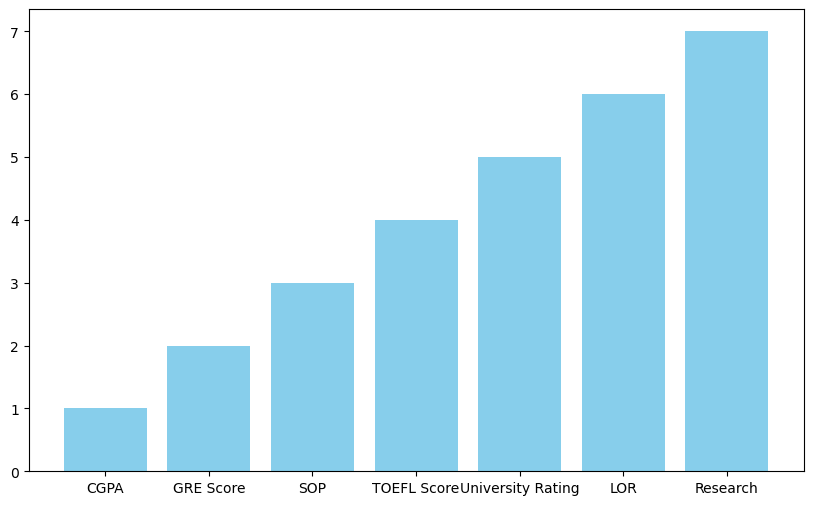

In [57]:
plt.figure(figsize=(10, 6))
plt.bar(sorted_cols, sorted_rankings, color='skyblue')

## ANN

In [58]:
import keras

In [59]:
from keras.models import Sequential

In [60]:
from keras.layers import Dense
from tensorflow.keras import layers

In [61]:
from keras.layers import LeakyReLU,PReLU,ELU
from kerastuner.tuners import RandomSearch

C:\Users\tanta\AppData\Local\Temp\ipykernel_3144\2204595460.py:2: DeprecationWarning: `import kerastuner` is deprecated, please use `import keras_tuner`.
  from kerastuner.tuners import RandomSearch


In [62]:
x2=df.loc[:,"GRE Score":"Research"]
y2=df.loc[:,"Chance of Admit "] ## dependent features

In [63]:
x2

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,337,118,4,4.5,4.5,9.65,1
1,324,107,4,4.0,4.5,8.87,1
2,316,104,3,3.0,3.5,8.00,1
3,322,110,3,3.5,2.5,8.67,1
4,314,103,2,2.0,3.0,8.21,0
...,...,...,...,...,...,...,...
395,324,110,3,3.5,3.5,9.04,1
396,325,107,3,3.0,3.5,9.11,1
397,330,116,4,5.0,4.5,9.45,1
398,312,103,3,3.5,4.0,8.78,0


In [64]:
y2

0      1
1      1
2      0
3      1
4      0
      ..
395    1
396    1
397    1
398    0
399    1
Name: Chance of Admit , Length: 400, dtype: int64

In [65]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
x2=ss.fit_transform(x2)

In [66]:
def build_model(hp):
    model = keras.Sequential()
    for i in range(hp.Int('num_layers', 2, 20)):
        model.add(layers.Dense(units=hp.Int('units_' + str(i),
                                            min_value=32,
                                            max_value=256,
                                            ),
                               activation='relu'))
    model.add(layers.Dense(1, activation='sigmoid'))
    model.compile(
        optimizer=keras.optimizers.Adam(
            hp.Choice('learning_rate', [1e-2, 1e-3, 1e-4])),
        loss="binary_crossentropy",
        metrics=[['accuracy']])
    return model

In [67]:

tuner = RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=5,
    executions_per_trial=3,
    directory='project',
    project_name='grevvvvvvvv')

Reloading Tuner from project\grevvvvvvvv\tuner0.json


In [68]:
tuner.search_space_summary()

Search space summary
Default search space size: 17
num_layers (Int)
{'default': None, 'conditions': [], 'min_value': 2, 'max_value': 20, 'step': 1, 'sampling': 'linear'}
units_0 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 256, 'step': 1, 'sampling': 'linear'}
units_1 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 256, 'step': 1, 'sampling': 'linear'}
learning_rate (Choice)
{'default': 0.01, 'conditions': [], 'values': [0.01, 0.001, 0.0001], 'ordered': True}
units_2 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 256, 'step': 1, 'sampling': 'linear'}
units_3 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 256, 'step': 1, 'sampling': 'linear'}
units_4 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 256, 'step': 1, 'sampling': 'linear'}
units_5 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 256, 'step': 1, 'sampling': 'linear'}
units_6 (Int)

In [69]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x2, y2, test_size=0.3, random_state=0)

In [70]:

tuner.search(X_train, y_train,
             epochs=5,
             validation_data=(X_test, y_test)
             )

In [71]:
tuner.results_summary()

Results summary
Results in project\grevvvvvvvv
Showing 10 best trials
Objective(name="val_accuracy", direction="max")

Trial 4 summary
Hyperparameters:
num_layers: 10
units_0: 150
units_1: 53
learning_rate: 0.01
units_2: 70
units_3: 186
units_4: 225
units_5: 228
units_6: 184
units_7: 168
units_8: 253
units_9: 43
units_10: 214
units_11: 159
units_12: 256
units_13: 177
units_14: 174
Score: 0.8444444338480631

Trial 1 summary
Hyperparameters:
num_layers: 2
units_0: 255
units_1: 82
learning_rate: 0.001
units_2: 131
units_3: 177
units_4: 76
Score: 0.8305555383364359

Trial 0 summary
Hyperparameters:
num_layers: 5
units_0: 143
units_1: 49
learning_rate: 0.001
units_2: 32
units_3: 32
units_4: 32
Score: 0.8277777632077535

Trial 2 summary
Hyperparameters:
num_layers: 2
units_0: 126
units_1: 214
learning_rate: 0.0001
units_2: 129
units_3: 253
units_4: 41
Score: 0.8222222328186035

Trial 3 summary
Hyperparameters:
num_layers: 15
units_0: 185
units_1: 32
learning_rate: 0.0001
units_2: 177
units_3

### Prepare the model

In [83]:
from keras.models import Sequential
from keras.layers import Dropout

In [84]:
model=Sequential()

In [85]:
num_layers=10

In [86]:
arr=np.array([150,53,70,186,225,228,184,168,253,43])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         400 non-null    int64  
 1   GRE Score          400 non-null    int64  
 2   TOEFL Score        400 non-null    int64  
 3   University Rating  400 non-null    int64  
 4   SOP                400 non-null    float64
 5   LOR                400 non-null    float64
 6   CGPA               400 non-null    float64
 7   Research           400 non-null    int64  
 8   Chance of Admit    400 non-null    int64  
dtypes: float64(3), int64(6)
memory usage: 28.2 KB


In [87]:
model.add((Dense(units=arr[0],kernel_initializer="he_uniform",activation="relu",input_dim=7)))
model.add(Dropout(0.3))

In [89]:
for i in range(1,num_layers):
    model.add((Dense(units=arr[i],kernel_initializer="he_uniform",activation="relu")))
    model.add(Dropout(0.3))
model.add(Dense(units=1,kernel_initializer="glorot_uniform",activation="sigmoid"))

In [90]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_11 (Dense)            (None, 150)               1200      
                                                                 
 dropout (Dropout)           (None, 150)               0         
                                                                 
 dense_12 (Dense)            (None, 53)                8003      
                                                                 
 dropout_1 (Dropout)         (None, 53)                0         
                                                                 
 dense_13 (Dense)            (None, 70)                3780      
                                                                 
 dropout_2 (Dropout)         (None, 70)                0         
                                                                 
 dense_14 (Dense)            (None, 186)              

In [91]:
model.compile(optimizer="adam",loss="binary_crossentropy",metrics=[["accuracy"]])

In [92]:
build_model=model.fit(X_train,y_train,validation_split=0.33,batch_size=10,epochs=100)

Epoch 1/100
19/19 [==============================] - 4s 49ms/step - loss: 2.0825 - accuracy: 0.5134 - val_loss: 0.5776 - val_accuracy: 0.6989
Epoch 2/100
19/19 [==============================] - 0s 16ms/step - loss: 1.2853 - accuracy: 0.5027 - val_loss: 0.6033 - val_accuracy: 0.7527
Epoch 3/100
19/19 [==============================] - 0s 16ms/step - loss: 0.8564 - accuracy: 0.5401 - val_loss: 0.6241 - val_accuracy: 0.7957
Epoch 4/100
19/19 [==============================] - 0s 16ms/step - loss: 0.7194 - accuracy: 0.5989 - val_loss: 0.5940 - val_accuracy: 0.8387
Epoch 5/100
19/19 [==============================] - 0s 16ms/step - loss: 0.7948 - accuracy: 0.5722 - val_loss: 0.5734 - val_accuracy: 0.8602
Epoch 6/100
19/19 [==============================] - 0s 16ms/step - loss: 0.6205 - accuracy: 0.6898 - val_loss: 0.5331 - val_accuracy: 0.8387
Epoch 7/100
19/19 [==============================] - 0s 16ms/step - loss: 0.7070 - accuracy: 0.6578 - val_loss: 0.4526 - val_accuracy: 0.8495
Epoch 

In [94]:
y_pred=model.predict(X_test)

4/4 [==============================] - 1s 9ms/step


In [95]:
from sklearn.metrics import confusion_matrix

In [97]:
y_pred=(y_pred>0.5)
cn=confusion_matrix(y_test,y_pred)

In [98]:
cn

array([[54, 12],
       [11, 43]], dtype=int64)

In [99]:
from sklearn.metrics import accuracy_score

In [100]:
scores=accuracy_score(y_pred,y_test)

In [101]:
scores

0.8083333333333333

In [102]:
print(build_model.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


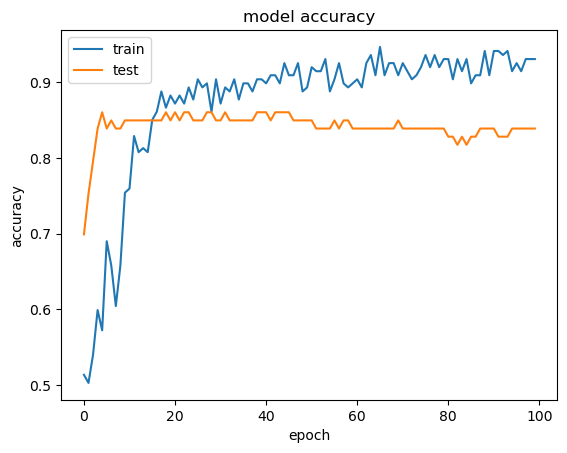

In [105]:
plt.plot(build_model.history['accuracy'])
plt.plot(build_model.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()